In [1]:
import yt


In [9]:
parameters = {"gamma":4./3., "periodicity":(True,True,True),"domain_dimensions":(1,1,0)}
ds = yt.load("../../binot/OrszagTang.0017.vtk", parameters=parameters)

yt : [INFO     ] 2016-09-12 16:47:54,539 Temporarily setting domain_right_edge = -domain_left_edge. This will be corrected automatically if it is not the case.
yt : [WARNING  ] 2016-09-12 16:47:54,552 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2016-09-12 16:47:54,553 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2016-09-12 16:47:54,555 Assuming 1.0 = 1.0 g
yt : [INFO     ] 2016-09-12 16:47:54,569 Parameters: current_time              = 0.06834876
yt : [INFO     ] 2016-09-12 16:47:54,570 Parameters: domain_dimensions         = [0 0 1]
yt : [INFO     ] 2016-09-12 16:47:54,573 Parameters: domain_left_edge          = [ 0.   0.  -0.5]
yt : [INFO     ] 2016-09-12 16:47:54,574 Parameters: domain_right_edge         = [-0.  -0.   0.5]
yt : [INFO     ] 2016-09-12 16:47:54,576 Parameters: cosmological_simulation   = 0.0


In [23]:
ds.print_stats()
print(ds.field_list)
ds.derived_field_list
print(parameters)

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         36864	            34
----------------------------------------------
   	     1	         36864


t = 6.83487600e-02 = 6.83487600e-02 s = 2.16584151e-09 years

Smallest Cell:
	Width: 1.688e-27 Mpc
	Width: 1.688e-21 pc
	Width: 3.482e-16 AU
	Width: 5.208e-03 cm
[('athena', 'cell_centered_B_x'), ('athena', 'cell_centered_B_y'), ('athena', 'cell_centered_B_z'), ('athena', 'density'), ('athena', 'pressure'), ('athena', 'velocity_x'), ('athena', 'velocity_y'), ('athena', 'velocity_z')]
{'periodicity': (True, True, True), 'gamma': 1.3333333333333333, 'domain_dimensions': (1, 1, 0)}


In [14]:
print (ds.domain_width.in_units("kpc"))
print (ds.domain_width.in_units("au"))
print (ds.domain_width.in_units("mile"))
print (ds.domain_width.in_units("km"))

[  3.24077908e-22   3.24077908e-22   3.24077929e-22] kpc
[  6.68458669e-14   6.68458669e-14   6.68458712e-14] au
[  6.21372697e-06   6.21372697e-06   6.21372737e-06] mile
[  9.99999936e-06   9.99999936e-06   1.00000000e-05] km


In [15]:
print (ds.index.grid_left_edge)

[[ 0.   0.  -0.5]] code_length


In [20]:
g = ds.index.grids[0]
print(g)
g.ActiveDimensions
g.LeftEdge, g.RightEdge
g.Level
g.Children





AthenaGrid_0000 ([192 192   1])


[]

In [22]:
print(g)

AthenaGrid_0000 ([192 192   1])


In [24]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0: continue
    print (f, fv.min(), fv.max())

(('athena', 'cell_centered_B_x'), -0.30025228858 code_magnetic, 0.30025228858 code_magnetic)
(('athena', 'cell_centered_B_y'), -0.318780094385 code_magnetic, 0.318780094385 code_magnetic)
(('athena', 'cell_centered_B_z'), 0.0 code_magnetic, 0.0 code_magnetic)
(('athena', 'density'), 0.178197979927 code_mass/code_length**3, 0.3874155581 code_mass/code_length**3)
(('athena', 'pressure'), 0.0926046967506 code_pressure, 0.338180840015 code_pressure)
(('athena', 'velocity_x'), -1.08482325077 code_length/code_time, 1.08482325077 code_length/code_time)
(('athena', 'velocity_y'), -1.27808356285 code_length/code_time, 1.27808356285 code_length/code_time)
(('athena', 'velocity_z'), 0.0 code_length/code_time, 0.0 code_length/code_time)


yt : [INFO     ] 2016-09-12 17:08:04,106 Projection completed
yt : [INFO     ] 2016-09-12 17:08:04,107 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-09-12 17:08:04,108 ylim = 0.000000 1.000000
yt : [INFO     ] 2016-09-12 17:08:04,111 xlim = 0.000000 1.000000
yt : [INFO     ] 2016-09-12 17:08:04,112 ylim = 0.000000 1.000000
yt : [INFO     ] 2016-09-12 17:08:04,115 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



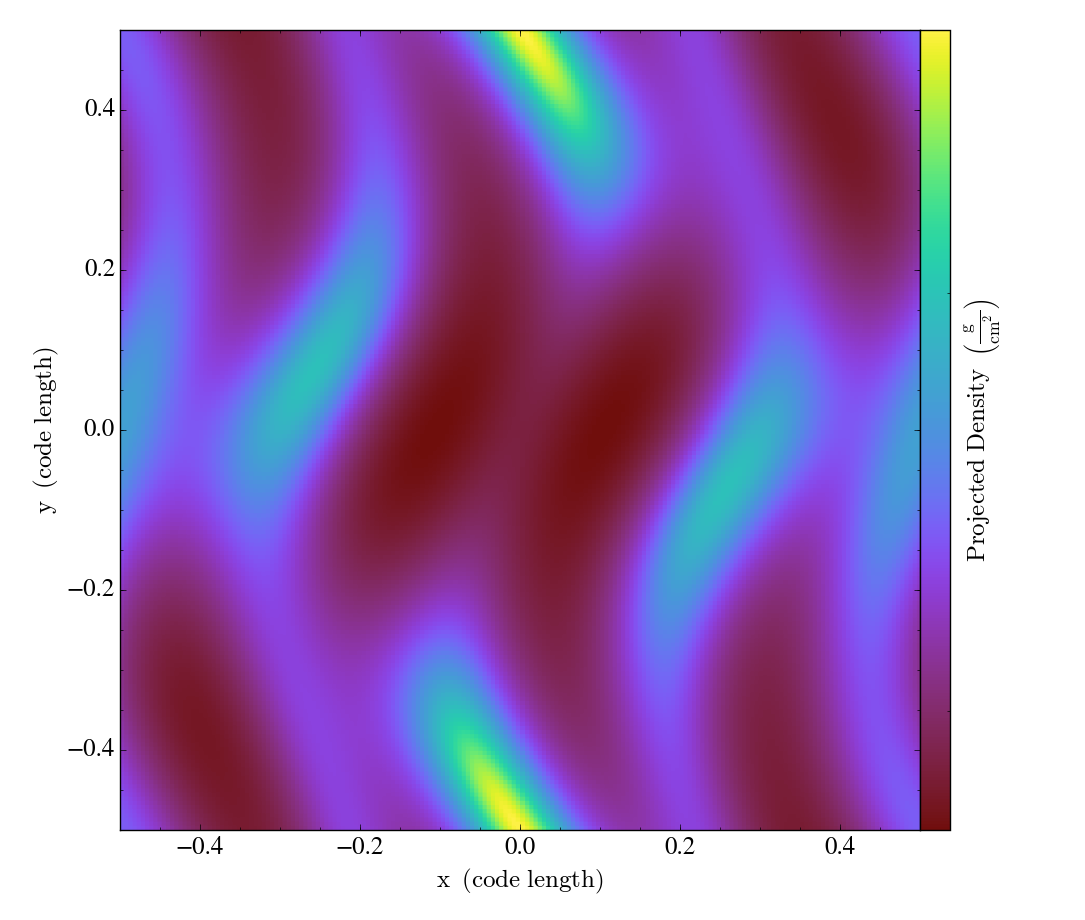

In [26]:
p = yt.ProjectionPlot(ds, "z", "density")
p.show()

yt : [INFO     ] 2016-09-12 17:12:01,802 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



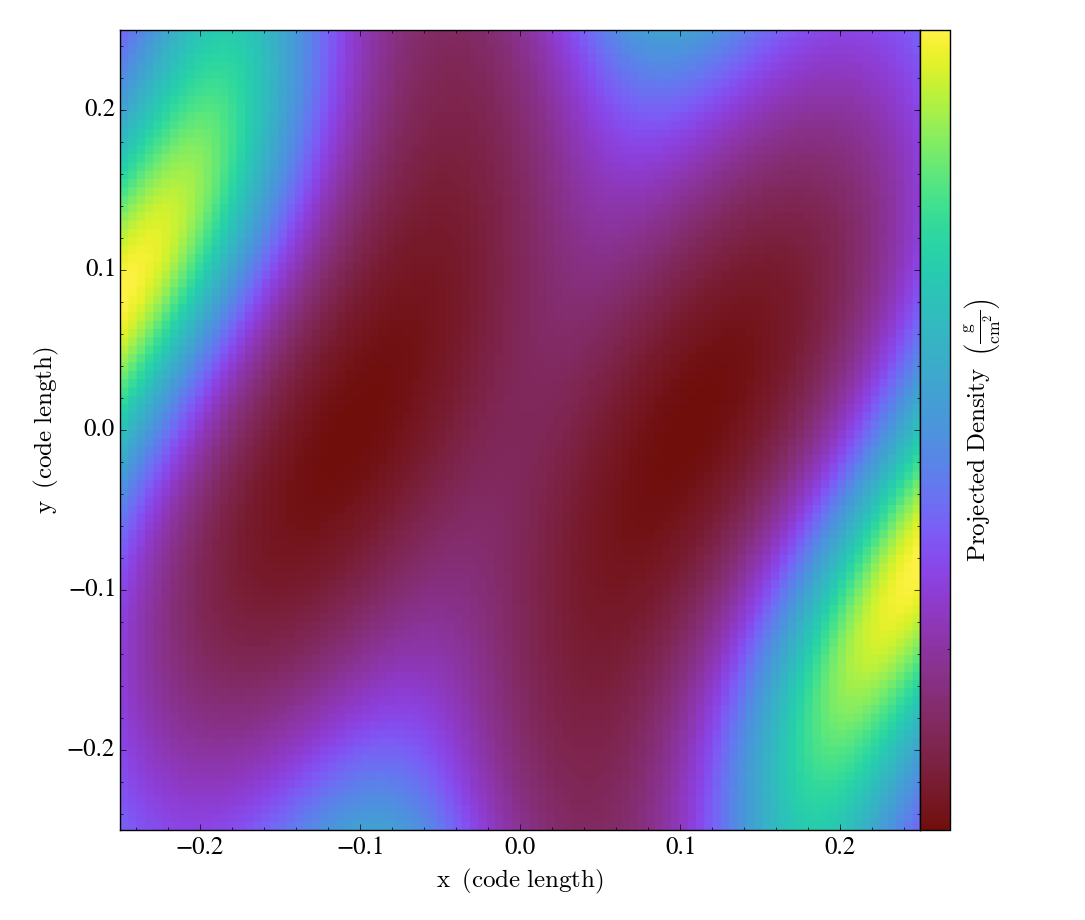

In [27]:
p.zoom(2.0)

yt : [INFO     ] 2016-09-12 17:13:13,453 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



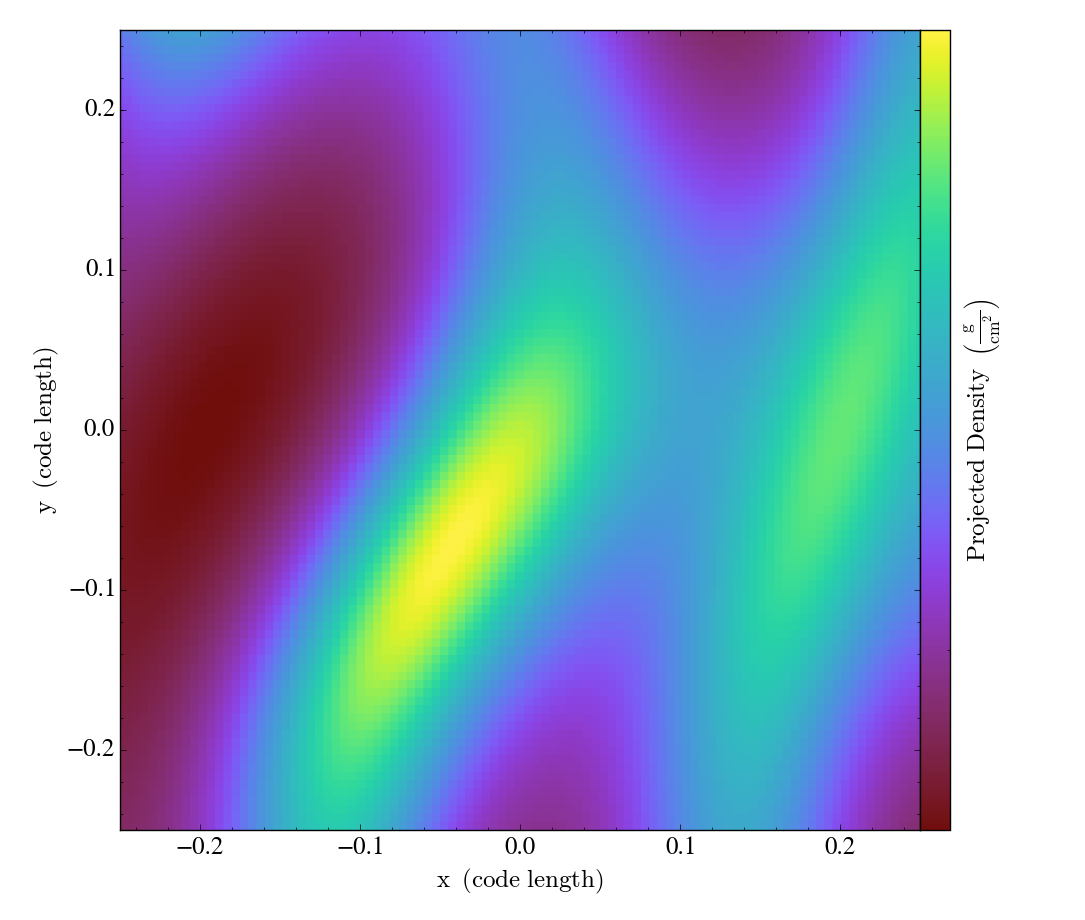

In [29]:
p.pan_rel((0.5, 0.0))

In [31]:
p.annotate_velocity



<bound method ?.VelocityCallback of <yt.visualization.plot_window.ProjectionPlot object at 0x7fe379ceae90>>